In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Pokémon adathalmaz beolvasása

df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Az adatunkat felbontjuk tanító és tesztelő halmazra

from sklearn.model_selection import train_test_split

features = ['HP', 'Attack', 'Defense', 'Speed', 'Generation']
label = 'Legendary'
feat_data = df[features].copy()
label_data = df[label].copy()
X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

In [4]:
# Döntési fa létrehozása

# max_dept - a döntési fa maximális mélysége
# criterion - mi alapján vizsgálja a döntések jóságát

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

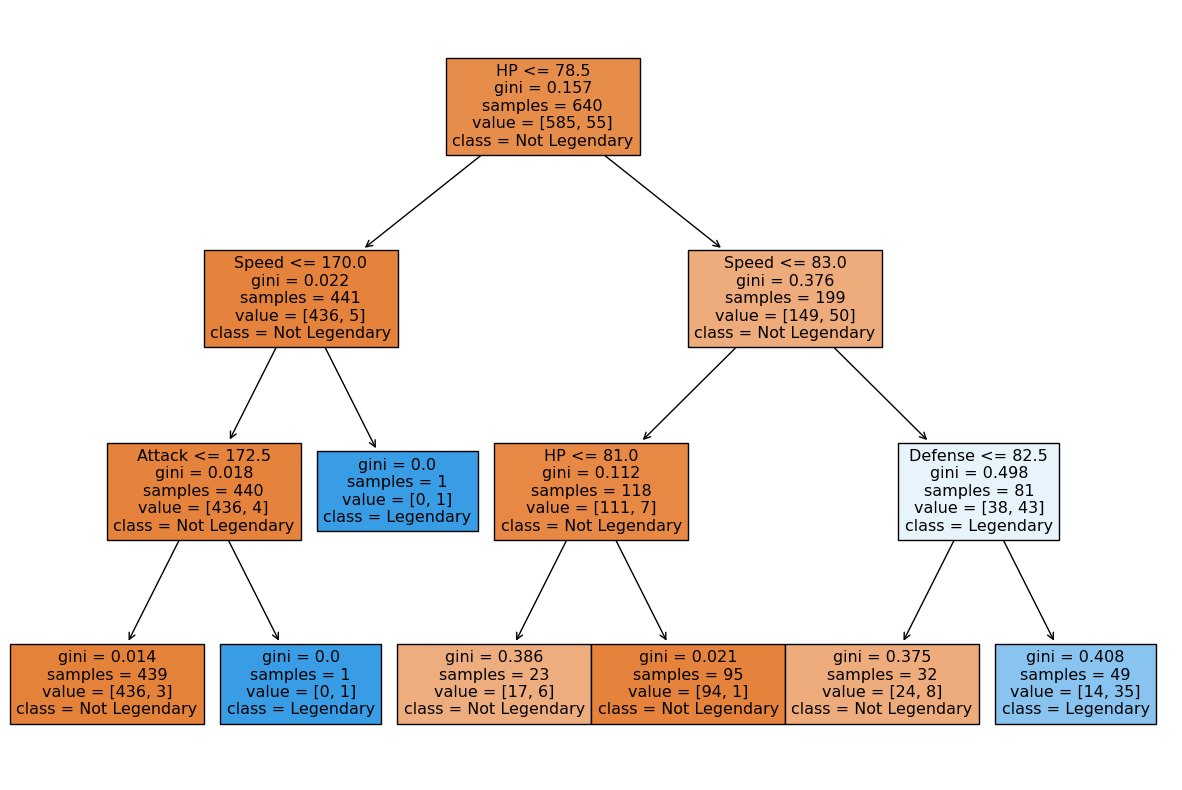

In [5]:
# Döntési fa kirajzolása

from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=['Not Legendary', 'Legendary'],
                   filled=True)

In [6]:
# Pontosság számolás
from sklearn import metrics

prediction = clf.predict(X_test)
print ("Accuracy:", metrics.accuracy_score(y_test.values, prediction))

Accuracy: 0.94375


In [7]:
# Komplexebb kiértékelés - cross-validation

from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.90625  0.90625  0.921875 0.921875 0.921875 0.9375   0.953125 0.953125
 0.96875  0.96875 ]
0.9359375


### Cross validation ábra

![Cross-validation](https://vargadaniel.web.elte.hu/bigdata/cross_validation.PNG)

/usr/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Attack')

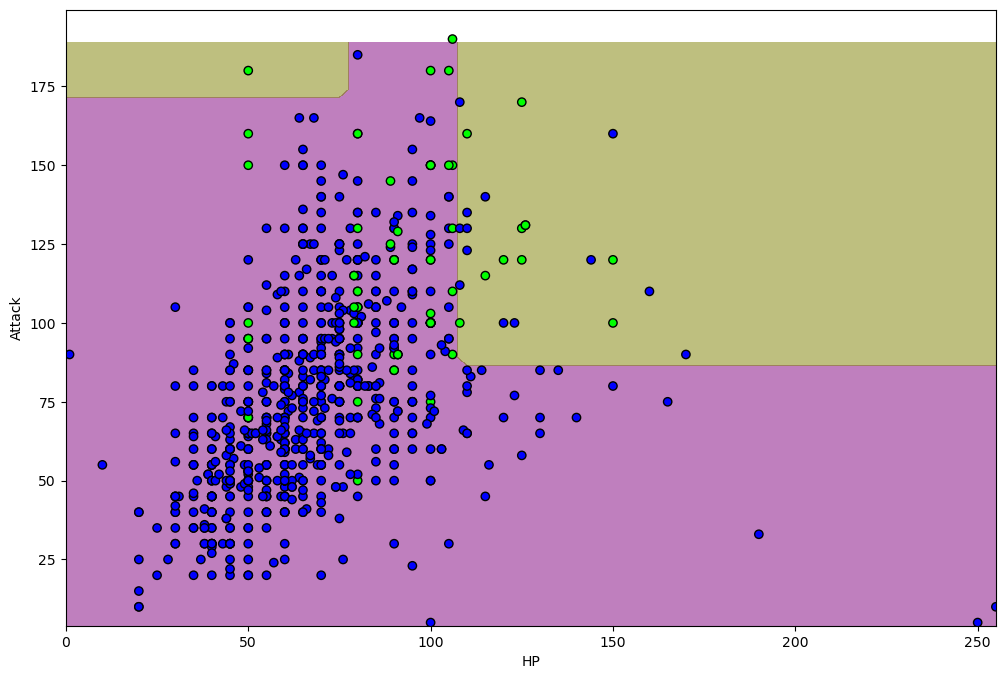

In [8]:
# Osztályozás megjelenítése két dimenzióban

features2 = ['HP', 'Attack']
label2 = 'Legendary'
feat_data2 = df[features2].copy()
label_data2 = df[label2].copy()
X_train, X_test, y_train, y_test = train_test_split(feat_data2, label_data2, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf.fit(X_train, y_train)

h = 5  # step size in the mesh
x_min, x_max = feat_data2['HP'].min() - 1, feat_data2['HP'].max() + 1
y_min, y_max = feat_data2['Attack'].min() - 1, feat_data2['Attack'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.flatten(), yy.flatten()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, cmap=plt.get_cmap("brg"), alpha=0.5)
plt.scatter(feat_data2['HP'], feat_data2['Attack'], c=label_data2, cmap=plt.get_cmap("brg"), edgecolors='black')
plt.xlabel('HP')
plt.ylabel('Attack')

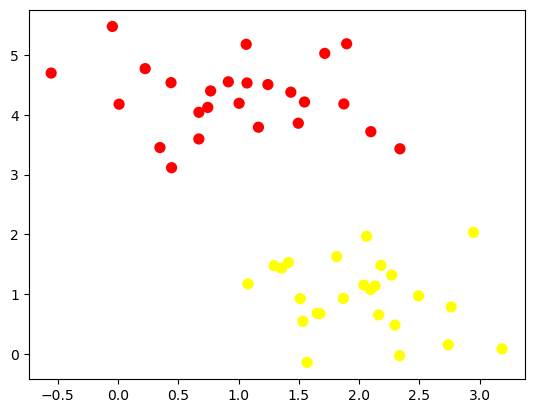

In [9]:
# Készítsünk új adathalmazt, random generált pontokból
# Ezzel a SVM jól bemutatható

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50, centers=2, random_state=0, cluster_std=0.6)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

In [10]:
from sklearn import svm

# Készítsük el az SVM osztályozónkat
# Az SVM esetén nagyon fontos, hogy milyen kernelt használunk
# kernel='linear' - lineáris kernel, egy hipersíkkal próbálja szeparálni az adatokat

#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
#poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [11]:
# Ez a függfény kirajzolja számunkra az SVM margin vektorait

def plot_svc_df(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    X, Y = np.meshgrid(x, y)
    xy = np.c_[X.flatten(), Y.flatten()]
    
    p = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, p, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'] )
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=3, facecolors='none', edgecolors='black')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

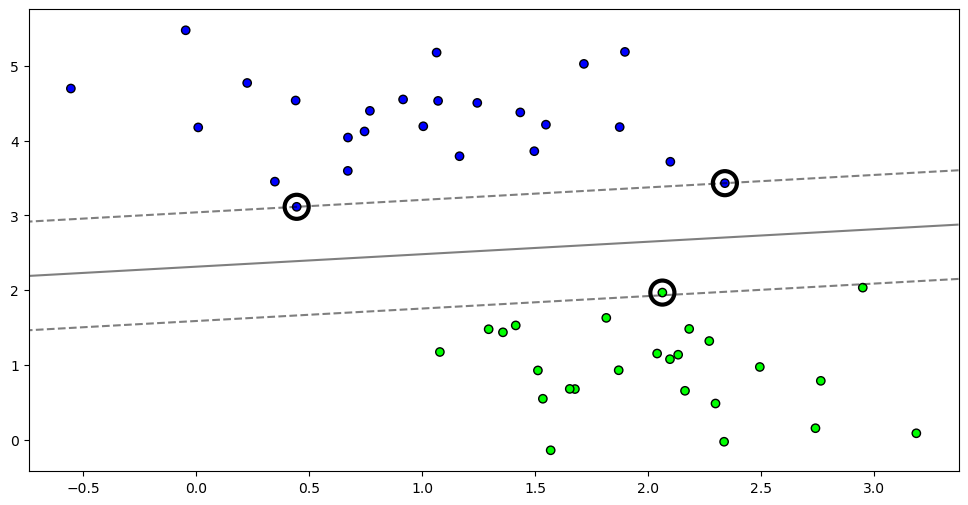

In [12]:
# Nézzük meg a szeparáló egyenest és a hozzá tartozó margókat az előbbi random generált adaton

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.get_cmap("brg"), edgecolors='black')
plot_svc_df(clf)

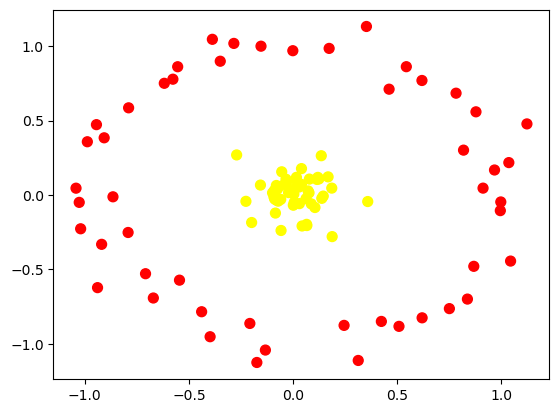

In [13]:
# Készítsünk új adathalmazt, amelyben a két osztály körökben helyezkedik el
# Mit fog ezzel kezdeni az SVM?

from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

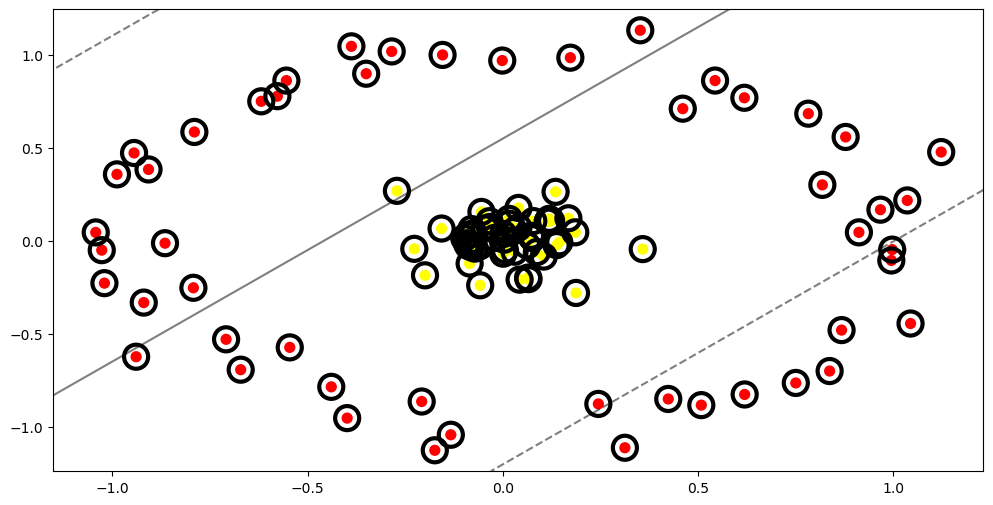

In [14]:
# Lineáris kernellel nem tudjuk jól szeparálni

clf3 = svm.SVC(kernel='linear').fit(X,y)

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_df(clf3)

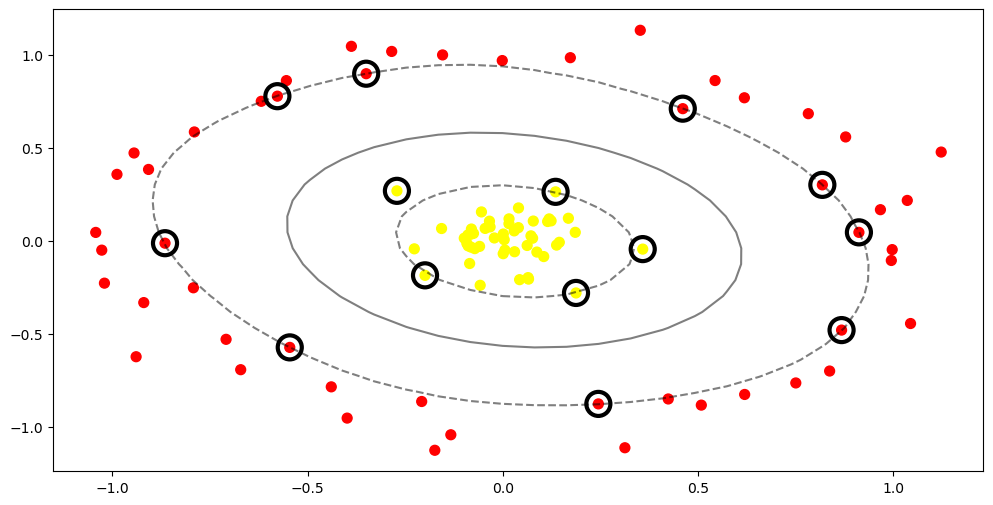

In [15]:
# Az rbf kernel már megoldja

clf3 = svm.SVC(kernel='rbf').fit(X,y)

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_df(clf3)

### Különböző kernelek a Support Vector osztályozóhoz

![SVC](https://vargadaniel.web.elte.hu/bigdata/svc.png)

## Szöveg osztályozás Naive Byes módszerrel

In [16]:
# Hozzunk létre szöveges adatot és készítsünk belőle vektorokat

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document or the second doument or the third document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [17]:
print(vectorizer.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
print(X.toarray())

[[0 1 0 1 1 0 0 0 1 0 1]
 [0 2 0 0 1 0 0 1 1 0 1]
 [1 0 0 0 1 1 0 0 1 1 1]
 [0 2 1 1 1 0 2 1 3 1 1]]


In [ ]:
# Alakítsuk át pandas dataframmé
# Így már könnyebben olvasható

x_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
x_df

,and,document,doument,first,is,one,or,second,the,third,this
0,0,1,0,1,1,0,0,0,1,0,1
1,0,2,0,0,1,0,0,1,1,0,1
2,1,0,0,0,1,1,0,0,1,1,1
3,0,2,1,1,1,0,2,1,3,1,1


In [ ]:
# Most nézzük meg a TFIDF reprezentációt is
# A TFIDF sokkal jobban jellemzi a dokumentumokat

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,and,document,doument,first,is,one,or,second,the,third,this
0,0.000000,0.469791,0.000000,0.580286,0.384085,0.000000,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.728794,0.000000,0.000000,0.297919,0.000000,0.000000,0.450103,0.297919,0.000000,0.297919
2,0.539278,0.000000,0.000000,0.000000,0.281417,0.539278,0.000000,0.000000,0.281417,0.425173,0.281417
3,0.000000,0.376606,0.295013,0.232592,0.153950,0.000000,0.590026,0.232592,0.461850,0.232592,0.153950


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Új adathalmazt töltünk be: newsgroups
# Ez az sklearn.datasets moduljából be is tudjuk tölteni, nem kell fájlból beolvasni
# Szöveges posztokat tartalmaz, mindegyikhez tartozik egy kategória, ahová be lett küldve (amelyikhez kapcsolódik)
# Ebben az esetben a feature-jeink a szöveg, a cíkéink (label) a kategória

dataset = fetch_20newsgroups()
print(len(dataset.data))
dataset.data[0]

11314


"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
# Ezek a kategóriák fordulnak elő

text_categories = dataset.target_names
text_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# Válasszunk most ki néhány kategóriát, amit használni fogunk

category = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# A modulból külön ekérdezhető egy tanítő és tesztelő részhalmaz a megadott kategóriákhoz

train_data = fetch_20newsgroups(subset="train", categories=category)
test_data = fetch_20newsgroups(subset="test", categories=category)

In [ ]:
# Néhény információ az adatunkról

print("Címkék: {}".format(len(category)))
print("Training számosság: {}".format(len(train_data.data)))
print("Test számosság {}".format(len(test_data.data)))

Címkék: 4
Training számosság: 2153
Test számosság 1432


In [ ]:
# Hozzunk létre egy pipelinet, aminek adjuk meg a tfidf átalakítást és a bayes modell építést

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

In [ ]:
# A teszt adatokhoz prediktált kategóriák

predicted_categories

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

In [ ]:
# A kategóriák szövegesen megjelenítve

print(np.array(test_data.target_names)[predicted_categories])

['soc.religion.christian' 'comp.graphics' 'sci.space' ... 'sci.space'
 'soc.religion.christian' 'sci.space']


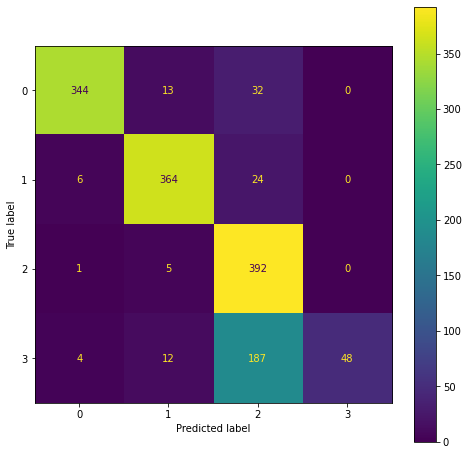

In [ ]:
# Rajzoljuk ki a confusion matrixot
# A confusion mátrix segítségével megnézhetjük hány elemet osztályoztunk jól és rosszul

from sklearn.metrics import ConfusionMatrixDisplay

mat = confusion_matrix(test_data.target, predicted_categories)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)

In [ ]:
# Osztályozzuk a saját szövegeinket

def predict_cat(s):
    pred = model.predict([s])
    return train_data.target_names[pred[0]]

In [ ]:
print(predict_cat("sending payload to ISS"))
print(predict_cat("determining the screen resolution"))

sci.space
comp.graphics


In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

In [ ]:
## Készítsünk szintetikus adatot

# informative- olyan osztalyok amik befolyasoljak a kimenetet
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

print('Shape: ', X.shape)

# Nézzük meg az első két sorát az adatunknak és a hozzá tartozó osztály címkéket
print(X[:2, :])
print(y[:2])

Shape:  (1000, 20)
[[-4.7705504  -1.88685058 -0.96057964  2.53850317 -6.5843005   3.45711663
  -7.46225013  2.01338213 -0.45086384 -1.89314931 -2.90675203 -0.21214568
  -0.9623956   3.93862591  0.06276375  0.33964269  4.0835676   1.31423977
  -2.17983117  3.1047287 ]
 [ 1.70511478  2.1471811  -0.90459064  2.13518507  7.66771352 -4.27022376
  -1.66817966 -1.73975132 -0.17929617 -0.04059739  3.3617517   3.4297913
   1.3207409  -8.37409874 -3.60616478  1.26137599  0.6244131  -2.85213733
   0.55204411 -1.35160618]]
[1 1]


In [ ]:
# Hozzunk létre egy bagging classifiert és nézzük meg a pontosságát...

clf = svm.SVC(kernel='linear')
model = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=7)

results = model_selection.cross_val_score(model, X, y, cv=10)
print(results.mean())

0.8450000000000001


In [ ]:
# ...és egy másikat is

dt = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=7)

results = model_selection.cross_val_score(model, X, y, cv=10)
print(results.mean())

0.859


In [ ]:
# Viszgáljuk meg a hiperparamétereket: osztályozók száma (néhány percig fut, az ezres miatt)

models = {}
n_trees = [1, 5, 10, 20, 50, 100]
for n in n_trees:
    models[str(n)] = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n)

results = []
names = []

for name, model in models.items():
    scores = model_selection.cross_val_score(model, X, y, cv=10)
    results.append(scores)
    names.append(name)
    print('param: ', name, ', mean accuracy: ', scores.mean(), ', std: ', scores.std())

param:  1 , mean accuracy:  0.776 , std:  0.03773592452822642
param:  5 , mean accuracy:  0.8460000000000001 , std:  0.04270831300812524
param:  10 , mean accuracy:  0.866 , std:  0.028000000000000025
param:  20 , mean accuracy:  0.8690000000000001 , std:  0.03014962686336268
param:  50 , mean accuracy:  0.8809999999999999 , std:  0.032695565448543656
param:  100 , mean accuracy:  0.8800000000000001 , std:  0.03687817782917154


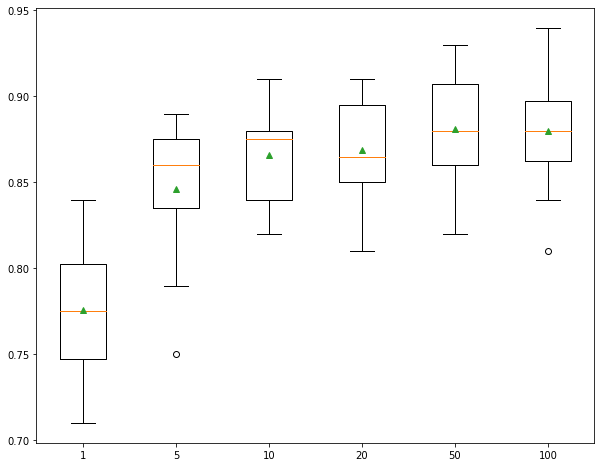

In [ ]:
# Rajzoljuk ki az eredményt
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
## Nézzük meg a random forest osztályozót! (először legyen az N és a max_depth alacsony, és nézzük meg, hogy javul a szám)

rfc = RandomForestClassifier(n_estimators = 50, max_depth=5, random_state=0)

results = model_selection.cross_val_score(rfc, X, y, cv=10)
print(results.mean())
print(results.std())

0.852
0.044676615807377355


In [ ]:
# Végül nézzünk meg egy AdaBoost osztályozót, amely eddig nem látott minősgű eredményt fog adni a megfelelő paraméterekkel

dt = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=dt, n_estimators=50, random_state=0)
results = model_selection.cross_val_score(clf, X, y, cv=10)
print(results.mean())
print(results.std())

0.8960000000000001
0.028000000000000004
